O objetivo desse notebook √© realizar algumas analises e tirar alguns insights sobre o titanic relacionado aos passageiros e os sobreviventes.

In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando o meu dataframe
df = pd.read_csv('Titanic-Dataset.csv')

Ap√≥s importar os dados, √© uma boa pr√°tica trazer algumas informa√ß√µes sobre o conjunto de dados.

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Nessa pr√≥xima etapa, vamos verificar alguns dados de colunas importantes do nosso dataframe, limpar valores vazios, mudar o tipo de algumas colunas e criar novas colunas para ter uma melhor volatilidade na analise e manipula√ß√£o dos dados.

In [7]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [8]:
# contagem de valores unicos dentro da coluna Sex
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
# contagem de valores unicos dentro da coluna Embarked
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df['Embarked'].isna().sum()

2

In [12]:
# Irei criar uma nova coluna que ser√° a soma de n√∫mero de irm√£os/c√¥njuges a bordo e o n√∫mero de pais/filhos a bordo
df['FamilySize'] = df['SibSp'] + df['Parch']

In [13]:
# Verifico se a coluna foi criada com sucesso
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  FamilySize  
0      0         A/5 21171   7.2500   NaN        S           1  
1      0          PC 17599  71.2833   C85        C           1  
2      0  STON/O2. 3101282   7.9250   NaN        S           0  
3      0            113803  53.1000  C123        S           1  
4      0            373450   8.0500   NaN        S           0

In [14]:
# Ser√° removido todas as linhas com valores vazios da coluna Embarked
df = df.dropna(subset=['Embarked'])

In [15]:
# A solu√ß√£o usada para os valores vazios da coluna Age ser√° substituir pela m√©dia de idade, que foi localizada pela fun√ß√£o describe.
df['Age'] = df['Age'].fillna(29)

In [16]:
# Vou converter para tipo inteiro a coluna Fare
df['Fare'] = df['Fare'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    int32  
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   889 non-null    int64  
dtypes: float64(1), int32(1), int64(6), object(5)
memory usage: 93.8+ KB


In [18]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [19]:
# vou pegar a soma e o total de sobreviventes e verificar a porcentagem dos sobreviventes do navio.
df_sobreviventes = df[df['Survived'] == 1]
df_soma_sobreviventes = df_sobreviventes['Survived'].count()
df_total_sobreviventes = df['Survived'].count()
df_sobreviventes_porcentagem = df_soma_sobreviventes / df_total_sobreviventes * 100
print(f"A porcentagem de sobreviventes na coluna 'Survived' √©: {df_sobreviventes_porcentagem:.2f}%")

A porcentagem de sobreviventes na coluna 'Survived' √©: 38.25%


In [20]:
# Agora ser√° calculado a m√©dia de idade dos sobreviventes e dos n√£o sobreviventes
df_idade_media_sobreviventes = df.groupby('Survived')['Age'].mean()
print("M√©dia de idade por sobreviventes:")
print(df_idade_media_sobreviventes)

M√©dia de idade por sobreviventes:
Survived
0    30.255920
1    28.316676
Name: Age, dtype: float64


Concluimos que a m√©dia de sobreviventes e n√£o sobreviventes por idade s√£o proximas, a m√©dia de idade dos que n√£o sobreviveram √© de 30 anos, enquanto a m√©dia dos que sobreviveram √© de 28 anos.

In [21]:
# Vou encontrar a maior idade da coluna Age
idade_max = df['Age'].max()

# Vou encontrar a menor idade da coluna Age
idade_min = df['Age'].min()

print(f"Maior idade: {idade_max}")
print(f"Menor idade: {idade_min}")

Maior idade: 80.0
Menor idade: 0.42


In [22]:
# Nesse bloco de c√≥digo, vou localizar a tarifa mais cara e a mais barata que foi paga.
tarifa_max = df['Fare'].max()

tarifa_min = df['Fare'].min()

print(f"Maior tarifa paga: {tarifa_max}")
print(f"Menor tarifa paga: {tarifa_min}")

Maior tarifa paga: 512
Menor tarifa paga: 0


In [23]:
# Agora ser√° criado uma tabela que mostre a m√©dia de idade para cada combina√ß√£o de classe e sexo
media_idade_por_comb = df.groupby(['Pclass', 'Sex'])['Age'].mean().reset_index()
print(media_idade_por_comb)

   Pclass     Sex        Age
0       1  female  33.728261
1       1    male  39.167377
2       2  female  28.730263
3       2    male  30.595648
4       3  female  23.864583
5       3    male  27.182767


Nesta pr√≥xima etapa, vamos utilizar gr√°ficos para visualizar melhor as informa√ß√µes sobre o n√∫mero de passageiros, n√∫mero de sobreviventes e n√£o sobreviventes, e a distribui√ß√£o da idade dos passageiros.

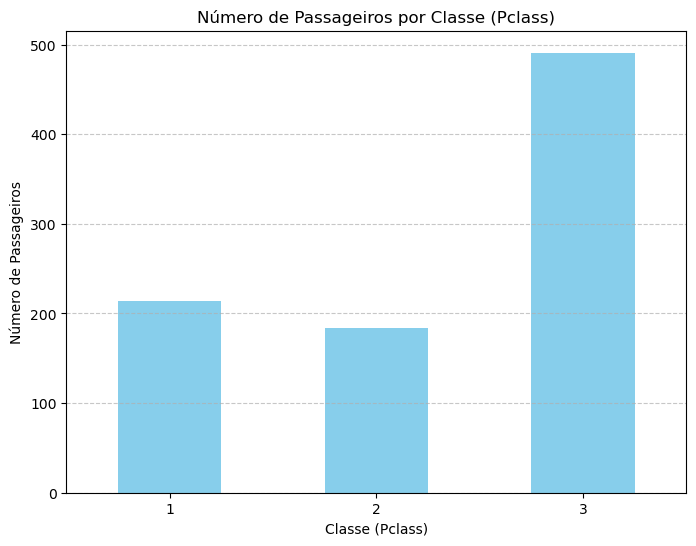

In [24]:
# Agora vou contar o n√∫mero de passageiros em cada categoria de Pclass e criar um gr√°fico de barras utilizando matplotlib
contagem_pclass = df['Pclass'].value_counts().sort_index()

# Criar o gr√°fico de barras
plt.figure(figsize=(8, 6))
contagem_pclass.plot(kind='bar', color='skyblue')
plt.title('N√∫mero de Passageiros por Classe (Pclass)')
plt.xlabel('Classe (Pclass)')
plt.ylabel('N√∫mero de Passageiros')
plt.xticks(rotation=0)  # Manter os r√≥tulos do eixo x horizontais
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

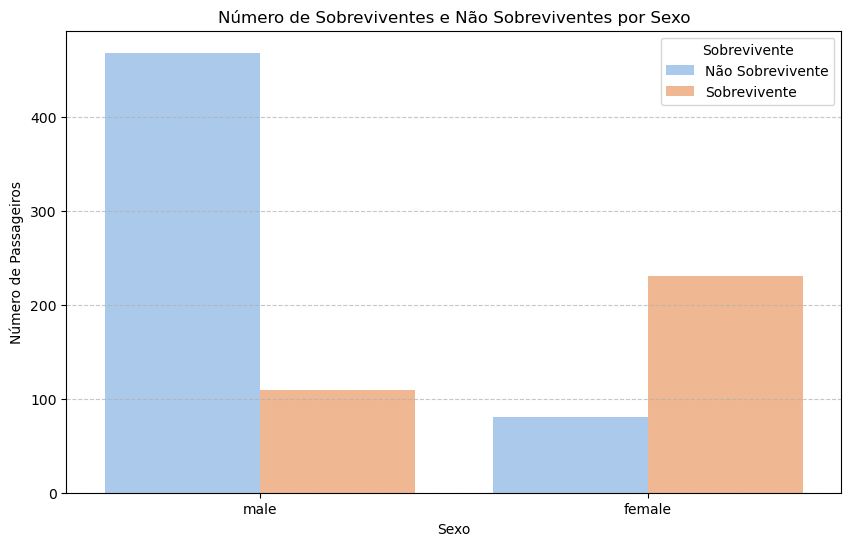

In [25]:
# Agora vou criar um gr√°fico de barras para mostrar o n√∫mero de sobreviventes e n√£o sobreviventes separados por sexo.

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette='pastel')

plt.title('N√∫mero de Sobreviventes e N√£o Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('N√∫mero de Passageiros')
plt.legend(title='Sobrevivente', labels=['N√£o Sobrevivente', 'Sobrevivente'])
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

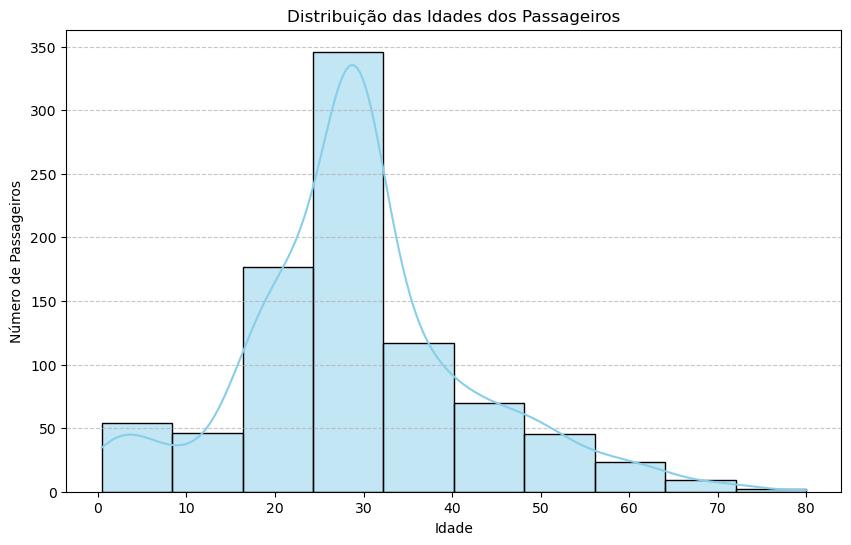

In [26]:
# Agora ser√° criado um histograma das idades dos passageiros

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribui√ß√£o das Idades dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('N√∫mero de Passageiros')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [27]:
# M√©dia de sobreviventes por porto de embarca√ß√£o
media_sobreviventes_por_embarked = df.groupby('Embarked')['Survived'].mean().reset_index()

print(media_sobreviventes_por_embarked)

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


In [28]:
# Agora irei conferir qual classe teve o maior numero de sobreviventes
sobreviventes_por_classe = df.groupby('Pclass')['Survived'].sum()

classe_maior_sobreviventes = sobreviventes_por_classe.idxmax()
numero_sobreviventes = sobreviventes_por_classe.max()

print(f"A classe com o maior n√∫mero de sobreviventes √© a {classe_maior_sobreviventes} com {numero_sobreviventes} sobreviventes.")

A classe com o maior n√∫mero de sobreviventes √© a 1 com 134 sobreviventes.


In [29]:
# Agora iremos verificar se ter familia a bordo aumenta as chances de sobrevivencia

df['Has_Family'] = df['FamilySize'] > 0

media_sobreviventes_com_familia = df[df['Has_Family']]['Survived'].mean()
media_sobreviventes_sem_familia = df[~df['Has_Family']]['Survived'].mean()

print(f"M√©dia de sobreviventes com familiares a bordo: {media_sobreviventes_com_familia:.2f}")
print(f"M√©dia de sobreviventes sem familiares a bordo: {media_sobreviventes_sem_familia:.2f}")

# Foi criado um condicional apenas para validarmos nossa tese'
if media_sobreviventes_com_familia > media_sobreviventes_sem_familia:
    print("Ter familiares a bordo parece aumentar a chance de sobreviv√™ncia.")
else:
    print("Ter familiares a bordo n√£o parece aumentar a chance de sobreviv√™ncia.")

M√©dia de sobreviventes com familiares a bordo: 0.51
M√©dia de sobreviventes sem familiares a bordo: 0.30
Ter familiares a bordo parece aumentar a chance de sobreviv√™ncia.


Aqui extra√≠mos algumas informa√ß√µes importantes. A primeira √© que a classe com o maior n√∫mero de sobreviventes √© a 1¬™, e isso n√£o acontece por acaso. As cabines dessa classe ficavam na parte superior do navio, mais pr√≥ximas dos botes salva-vidas. A segunda informa√ß√£o √© que a m√©dia de sobreviventes com familiares √© ligeiramente maior que a m√©dia de sobreviventes sem familiares a bordo, indicando que ter fam√≠lia a bordo aumentou as chances de sobreviv√™ncia.

In [30]:
# Ser√° criado uma nova coluna para validar quais passageiros s√£o menores de idade
df['isChild'] = df['Age'] < 18

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [31]:
# Ser√° criado um pivot table mostrando a m√©dia de sobreviventes para cada classe e sexo.

pivot_table = df.pivot_table(
    index='Pclass',     # Linha
    columns='Sex',      # Colunas
    values='Survived',  # Valores para calcular a m√©dia
    aggfunc='mean'      # Fun√ß√£o de agrega√ß√£o: calcular a m√©dia
)

print(pivot_table)

Sex       female      male
Pclass                    
1       0.967391  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


In [32]:
# ser√° criado uma coluna 'Title' extra√≠da do nome do passageiro(a).
df['Title'] = df['Name'].str.extract(r',\s*([A-Za-z]+)\.')

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [33]:
# ser√° aplicado uma fun√ß√£o de normaliza√ß√£o nos valores da coluna fare e em seguida um apply para aplicar o normalize a cada valor da coluna fare.
def normalize(fare):

    return (fare - df['Fare'].min()) / (df['Fare'].max() - df['Fare'].min())

df['Fare_Normalized'] = df['Fare'].apply(normalize)

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [34]:
# Agora foi agrupado por 'Title' e mostrado a m√©dia de idade, tarifa e sobreviv√™ncia.
grouped = df.groupby('Title').mean()


print(grouped[['Age', 'Fare', 'Survived']])

                Age       Fare  Survived
Title                                   
Capt      70.000000  71.000000  0.000000
Col       58.000000  30.500000  0.500000
Don       40.000000  27.000000  0.000000
Dr        40.142857  48.714286  0.428571
Jonkheer  38.000000   0.000000  0.000000
Lady      48.000000  39.000000  1.000000
Major     48.500000  28.000000  0.500000
Master     7.016750  34.250000  0.575000
Miss      23.121547  43.132597  0.696133
Mlle      24.000000  59.000000  1.000000
Mme       24.000000  69.000000  1.000000
Mr        31.592843  24.021277  0.156673
Mrs       34.741935  44.508065  0.790323
Ms        28.000000  13.000000  1.000000
Rev       43.166667  18.166667  0.000000
Sir       49.000000  56.000000  1.000000


In [35]:
# Foi feito uma distribui√ß√£o de passageiros agrupados pelo titulo e a classe.
distribution = df.groupby(['Title', 'Pclass']).size().unstack(fill_value=0)

print(distribution)

Pclass      1   2    3
Title                 
Capt        1   0    0
Col         2   0    0
Don         1   0    0
Dr          5   2    0
Jonkheer    1   0    0
Lady        1   0    0
Major       2   0    0
Master      3   9   28
Miss       45  34  102
Mlle        2   0    0
Mme         1   0    0
Mr        107  91  319
Mrs        41  41   42
Ms          0   1    0
Rev         0   6    0
Sir         1   0    0


In [36]:
# Agrupado o n√∫mero de passageiros √∫nicos em cada combina√ß√£o de 'Embarked' e 'Pclass'.
unique_passengers = df.groupby(['Embarked', 'Pclass'])['PassengerId'].nunique()

print(unique_passengers)

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: PassengerId, dtype: int64


In [37]:
# Foi realizado o calculo da m√©dia de tarifa por porto de embarque e classe.
fare_mean = df.groupby(['Embarked', 'Pclass'])['Fare'].mean()
print(fare_mean)


Embarked  Pclass
C         1         104.235294
          2          25.000000
          3          10.833333
Q         1          90.000000
          2          12.000000
          3          10.555556
S         1          69.992126
          2          20.140244
          3          14.144476
Name: Fare, dtype: float64


In [38]:
# Agora eu preciso verificar se h√° uma correla√ß√£o entre o local de embarque e a sobreviv√™ncia. Nesse caso, eu primeiro irei criar uma tabela de contingencia.
contingency_table = pd.crosstab(df['Embarked'], df['Survived'])

print(contingency_table)


# Em seguida Calcular o Cram√©r's V para medir a for√ßa da associa√ß√£o entre Embarked e Survived.
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)


# Calcular Cram√©r's V
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cram√©r's V: {cramers_v}")

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217
Cram√©r's V: 0.17261682709984438


Aqui, para verificar se existe uma correla√ß√£o entre o local de embarque e a sobreviv√™ncia, utilizei o Cram√©r's V, que √© uma medida de associa√ß√£o entre duas vari√°veis categ√≥ricas.

O resultado foi de 0,173, indicando uma correla√ß√£o fraca entre o local de embarque e a sobreviv√™ncia. Embora exista alguma associa√ß√£o, ela n√£o √© muito forte (lembrando que, quanto mais pr√≥ximo do valor 1, maior a rela√ß√£o entre as vari√°veis).

Embora o local de embarque possa ter algum impacto na sobreviv√™ncia, ele provavelmente n√£o √© um fator determinante isolado. Outros fatores, como a classe do bilhete, a idade ou se o passageiro tinha familiares a bordo, provavelmente t√™m uma influ√™ncia maior.

In [39]:
# Utilizei a fun√ß√£o melt para transformar o DataFrame para long format com vari√°veis 'Age' e 'Fare'.
df_melted = pd.melt(df, id_vars=['PassengerId'], value_vars=['Age', 'Fare'], 
                    var_name='Variable', value_name='Value')

print(df_melted)

      PassengerId Variable  Value
0               1      Age   22.0
1               2      Age   38.0
2               3      Age   26.0
3               4      Age   35.0
4               5      Age   35.0
...           ...      ...    ...
1773          887     Fare   13.0
1774          888     Fare   30.0
1775          889     Fare   23.0
1776          890     Fare   30.0
1777          891     Fare    7.0

[1778 rows x 3 columns]


In [40]:
# Neste codigo irei encontrar todos os passageiros com idades entre 20 e 30 anos.

passengers_20_to_30 = df[(df['Age'] >= 20) & (df['Age'] <= 30)]


print(passengers_20_to_30)


     PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
5              6         0       3   
8              9         1       3   
12            13         0       3   
..           ...       ...     ...   
883          884         0       2   
884          885         0       3   
886          887         0       2   
888          889         0       3   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
5                                     Moran, Mr. James    male  29.0      0   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
..                                                 ...     ...   ... 

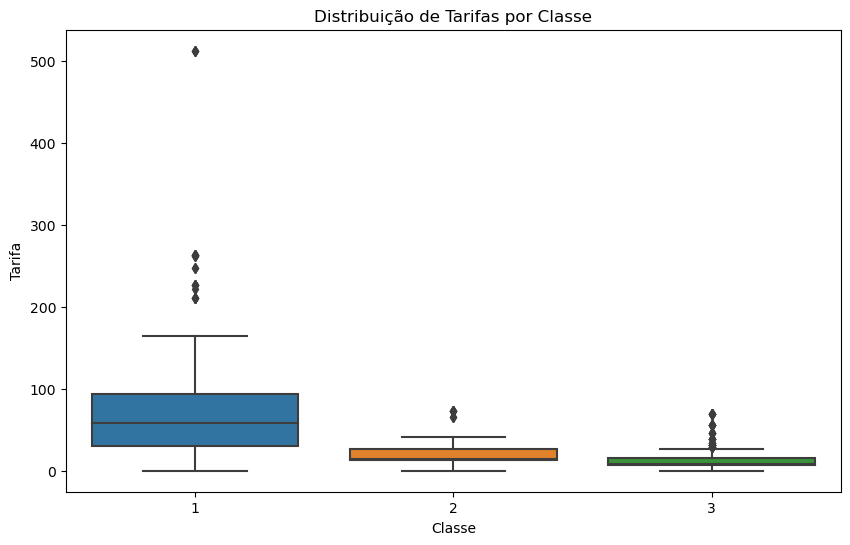

In [41]:
# Criei um boxplot para comparar a distribui√ß√£o de tarifas entre diferentes classes.

# boxplot usando seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)

# t√≠tulo e r√≥tulos aos eixos
plt.title('Distribui√ß√£o de Tarifas por Classe')
plt.xlabel('Classe')
plt.ylabel('Tarifa')


plt.show()

In [42]:
# Criei uma coluna que categoriza os passageiros com base na tarifa paga: baixa, m√©dia e alta utilizando a fun√ß√£o cut()
# Intervalos: 0-20 (baixa), 21-50 (m√©dia), acima de 50 (alta)
bins = [0, 20, 50, float('inf')] 
labels = ['Baixa', 'M√©dia', 'Alta']

df['FareCategory'] = pd.cut(df['Fare'], bins=bins, labels=labels)

df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket  Fare Cabin Embarked  FamilySize  Has_Family  \
0      0         A/5 21171     7   NaN        S           1        True   
1      0          PC 17599    71   C85        C           1        True   
2      0  STON/O2. 3101282     7   NaN        S           0       False   
3      0            113803    53  C123        S           1        True   
4      0            373450     8   NaN        S           0       False   

   isChild Title  Fare_Normalized FareCategory  
0    False    Mr         0.013672        Baixa  
1    False   Mrs         0.138672         Alta  
2    False  Miss         0.013672        Baixa  
3    False   Mrs         0.103516         Alta  
4    False    Mr         0.015625        Baixa

In [43]:
# Utilizei o m√©todo do IQR (Interquartile Range) para identificar os outliers na coluna fare.
# Calcular Q1 e Q3
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

# Calcular o IQR
IQR = Q3 - Q1

# Definir os limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Valores abaixo de ùëÑ 1 ‚àí 1.5 √ó IQR Q1‚àí1.5√óIQR ou acima de ùëÑ 3 + 1.5 √ó IQR Q3+1.5√óIQR s√£o geralmente considerados outliers.
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]

print("Limite Inferior:", lower_bound)
print("Limite Superior:", upper_bound)
print("\nOutliers identificados:")
print(outliers)

Limite Inferior: -29.0
Limite Superior: 67.0

Outliers identificados:
     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  29.0      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   

In [44]:
# Analise de sobrevivencia para passageiros sem parentes a bordo.
passengers_no_family = df[df['FamilySize'] == 0]

# Calcular a taxa de sobreviv√™ncia
survival_rate_no_family = passengers_no_family['Survived'].mean() * 100

print(f"Taxa de sobreviv√™ncia para passageiros sem parentes a bordo: {survival_rate_no_family:.2f}%")

overall_survival_rate = df['Survived'].mean() * 100
print(f"Taxa de sobreviv√™ncia geral: {overall_survival_rate:.2f}%")

Taxa de sobreviv√™ncia para passageiros sem parentes a bordo: 30.09%
Taxa de sobreviv√™ncia geral: 38.25%


In [45]:
#Feito a compara√ß√£o da taxa de sobreviv√™ncia entre passageiros com e sem cabines atribu√≠das.

# Identificar passageiros com e sem cabines atribu√≠das
df['HasCabin'] = df['Cabin'].notna()

# Calcular a taxa de sobreviv√™ncia para passageiros com cabine
survival_rate_with_cabin = df[df['HasCabin']]['Survived'].mean() * 100

# O simbolo ~ √© um operador de nega√ß√£o em pandas, utilizado para converter uma opera√ß√£o booleana
survival_rate_without_cabin = df[~df['HasCabin']]['Survived'].mean() * 100

print(f"Taxa de sobreviv√™ncia para passageiros com cabine atribu√≠da: {survival_rate_with_cabin:.2f}%")
print(f"Taxa de sobreviv√™ncia para passageiros sem cabine atribu√≠da: {survival_rate_without_cabin:.2f}%")

Taxa de sobreviv√™ncia para passageiros com cabine atribu√≠da: 66.34%
Taxa de sobreviv√™ncia para passageiros sem cabine atribu√≠da: 29.99%


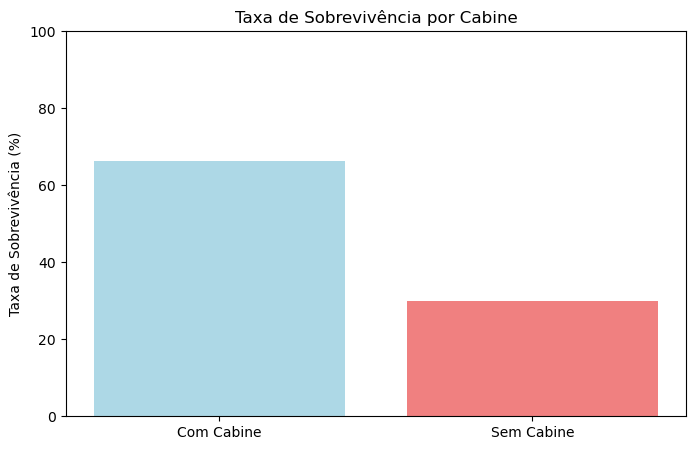

In [46]:
# Dados para visualiza√ß√£o
survival_rates = [survival_rate_with_cabin, survival_rate_without_cabin]
labels = ['Com Cabine', 'Sem Cabine']

plt.figure(figsize=(8, 5))
plt.bar(labels, survival_rates, color=['lightblue', 'lightcoral'])
plt.title('Taxa de Sobreviv√™ncia por Cabine')
plt.ylabel('Taxa de Sobreviv√™ncia (%)')
plt.ylim(0, 100)
plt.show()

Por meio do gr√°fico Podemos ver que existe uma diferen√ßa clara de taxa de sobrevivencia para passageiros com cabine atribuida.

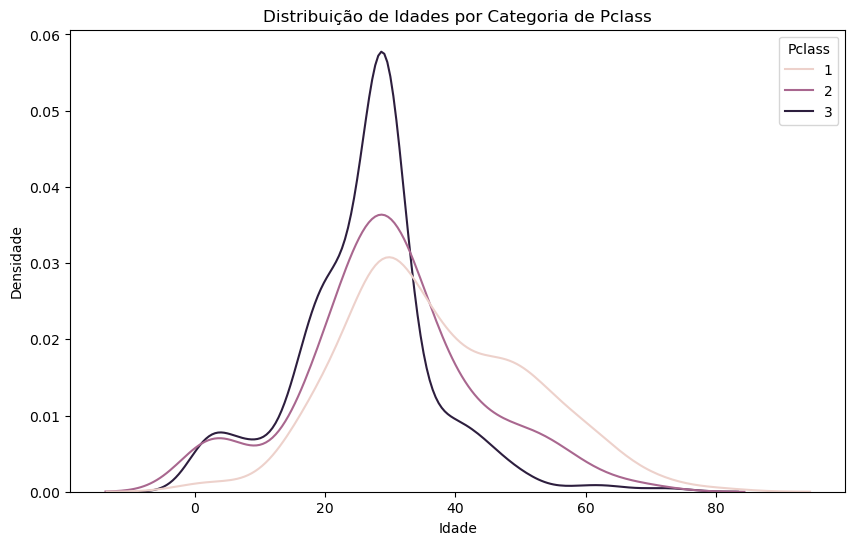

In [47]:
# Agora vamos visualizar a distribui√ß√£o de idades para cada categoria de 'Pclass' usando um gr√°fico de densidade.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Pclass', common_norm=False)

# Adicionar t√≠tulo e labels
plt.title('Distribui√ß√£o de Idades por Categoria de Pclass')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.show()

In [48]:
# Criei um relat√≥rio com a taxa de sobreviv√™ncia por idade e sexo.
bins = [0, 12, 18, 30, 40, 50, 60, 100]
labels = ['0-12', '13-18', '19-30', '31-40', '41-50', '51-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calcular a taxa de sobreviv√™ncia por faixa et√°ria e sexo
survival_rate = df.groupby(['AgeGroup', 'Sex'])['Survived'].mean().reset_index()
survival_rate['Survived'] = survival_rate['Survived'] * 100  # Converter para porcentagem

print(survival_rate)

   AgeGroup     Sex    Survived
0      0-12  female   59.375000
1      0-12    male   56.756757
2     13-18  female   75.000000
3     13-18    male    8.823529
4     19-30  female   72.727273
5     19-30    male   14.473684
6     31-40  female   83.333333
7     31-40    male   23.000000
8     41-50  female   67.741935
9     41-50    male   21.818182
10    51-60  female   92.857143
11    51-60    male   14.285714
12      60+  female  100.000000
13      60+    male   10.526316


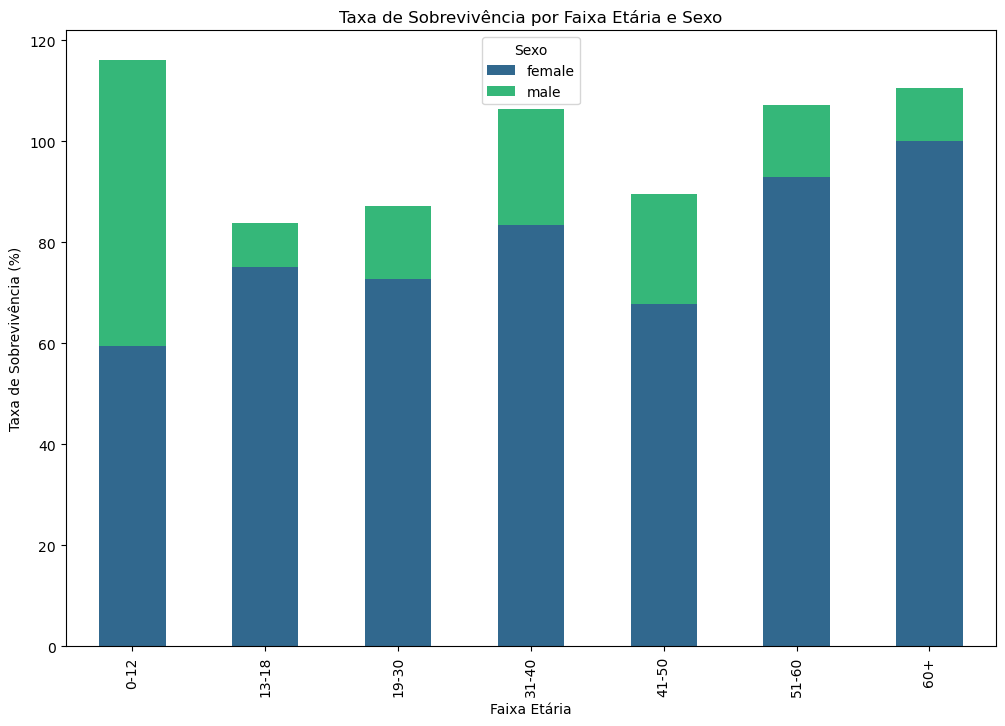

In [49]:
# Aqui ser√° o gr√°fico representando o relat√≥rio acima

# Pivotando os dados para que cada sexo fique em colunas separadas
pivot_data = survival_rate.pivot(index='AgeGroup', columns='Sex', values='Survived')

# Criando as barras empilhadas com matplotlib
pivot_data.plot(kind='bar', stacked=True, color=sns.color_palette('viridis', 2), figsize=(12, 8))

# Adicionando t√≠tulo e labels
plt.title('Taxa de Sobreviv√™ncia por Faixa Et√°ria e Sexo')
plt.xlabel('Faixa Et√°ria')
plt.ylabel('Taxa de Sobreviv√™ncia (%)')

plt.legend(title='Sexo')
plt.show()

In [50]:
# Agora faremos uma analise detalhada da rela√ß√£o entre o local de embarque e a classe socioecon√¥mica dos passageiros.
embarked_pclass_counts = df.groupby(['Embarked', 'Pclass']).size().unstack()

print(embarked_pclass_counts)

Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


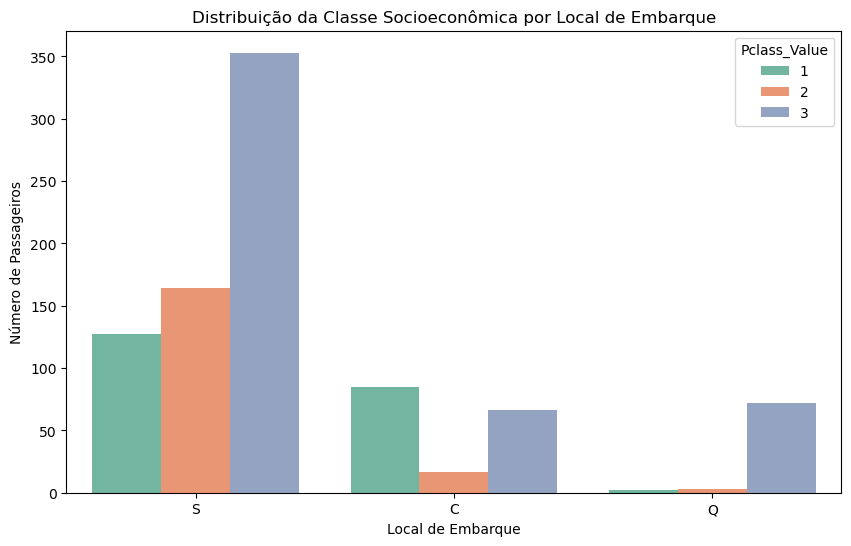

In [51]:
# Reformatar os dados para o formato longo para visualiza√ß√£o
long_df = df.melt(id_vars='Embarked', value_vars='Pclass', var_name='Class_Type', value_name='Pclass_Value')

# Criar o gr√°fico de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=long_df, x='Embarked', hue='Pclass_Value', palette='Set2')

# Adicionar t√≠tulo e labels
plt.title('Distribui√ß√£o da Classe Socioecon√¥mica por Local de Embarque')
plt.xlabel('Local de Embarque')
plt.ylabel('N√∫mero de Passageiros')

plt.show()

Podemos ver que o local de embarque S foi o local que mais teve embarques em todas as classes. Isso acontece porque o embarque S √© Southampton que √© a maior cidade portu√°ria da costa sul do Reino Unido e foi de l√° que o titanic partiu em sua viagem.

In [52]:
# Agora vamos exportar o arquivo no formato csv

df.to_csv('titanic_final.csv', index=False)
